In [284]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('tiezi_liulan_zan.csv')
data2 = pd.read_csv('title_url.csv')
data3 = pd.read_csv('list_time.csv')

In [285]:
data3.columns = ['url', 'modified_time', 'published_time']

In [286]:
data = pd.merge(data1, data2, how='left', left_index=True, right_index=True)
data = pd.merge(data, data3, how='left', left_on='url', right_on='url')

In [287]:
data['clone_time'].fillna('策略已被克隆0次', inplace=True)
data.fillna(0, inplace=True)
data['clone_time'] = [int(x[6:-1]) for x in data['clone_time']]

In [289]:
share1t = data['share1'].copy()
share2t = data['share2'].copy()
share1t[share1t == '本主题有分享回测'] = 1.0
share1t[share1t == '本主题有分享研究'] = -1.0
share2t[share2t == '本主题有分享研究'] = 1.0
for i in range(len(data)):
    if share1t[i] == -1.0:
        share1t[i] = 0.0
        share2t[i] = 1.0

In [290]:
del data['share1'], data['share2']
data['share1t'] = pd.Series(share1t, dtype=np.int64)
data['share2t'] = pd.Series(share2t, dtype=np.int64)

In [291]:
data.columns = ['tie_zi', 'liu_lan', 'zan', 'url', 'title', 'clone_time',
                'modified_time', 'published_time', 'share1', 'share2']

In [292]:
data.head()

,tie_zi,liu_lan,zan,url,title,clone_time,modified_time,published_time,share1,share2
0,70,53813,32,765,新功能发布汇总贴 - 20170706更新,2,2017-04-11T07:53:36.964Z,2016-03-28T10:00:58.623Z,1,1
1,498,145160,21,544,小伙伴们，你最希望Ricequant加入什么样的功能呢？,0,2017-08-24T02:21:47.706Z,2016-02-03T11:28:24.413Z,0,0
2,2,173,0,3920,“无码”量化——向导式策略上线！,0,2017-08-25T01:38:37.142Z,2017-08-21T06:43:26.248Z,0,0
3,10,1954,4,3760,【实盘】神秘活动：米筐精美T恤、话费等你来拿！,0,2017-08-09T14:14:19.954Z,2017-07-28T07:35:53.543Z,0,0
4,13,2159,0,2962,社区常见问题汇总【0725更新】,0,2017-08-03T09:26:50.424Z,2017-03-28T03:21:59.328Z,0,0


In [293]:
describe = data.describe().applymap(lambda x: '%.2f' % x )

In [294]:
describe

,tie_zi,liu_lan,zan,url,clone_time,share1,share2
count,3389.00,3389.00,3389.00,3389.00,3389.00,3389.00,3389.00
mean,5.46,1777.09,0.89,1955.17,21.58,0.19,0.10
std,11.29,5712.03,3.90,1138.89,181.83,0.39,0.29
min,1.00,3.00,0.00,1.00,0.00,0.00,0.00
25%,2.00,323.00,0.00,984.00,0.00,0.00,0.00
50%,3.00,633.00,0.00,1951.00,0.00,0.00,0.00
75%,6.00,1416.00,0.00,2922.00,1.00,0.00,0.00
max,498.00,145160.00,73.00,3940.00,7627.00,1.00,1.00


In [254]:
data.sort_values(by='tie_zi', ascending=False).head(10)

,tie_zi,liu_lan,zan,url,title,clone_time,modified_time,published_time,share1,share2
1,498,145160,21,544,小伙伴们，你最希望Ricequant加入什么样的功能呢？,0,2017-08-24T02:21:47.706Z,2016-02-03T11:28:24.413Z,0,0
428,187,117987,73,394,【高收益低回撤】【止损】【夏普率4.0】改进版小盘股策略,4971,2017-06-29T07:14:22.203Z,2015-12-29T07:11:37.324Z,1,0
356,147,58966,37,2147,【又更新了】有“脑子”会“看盘”的小盘股【年化68.444% | 夏普3.4771 | 回撤...,1435,2017-07-11T03:31:18.265Z,2016-12-05T13:13:32.853Z,1,0
376,99,80413,38,285,Graham number 格雷厄姆数字价值投资法,2572,2017-07-07T10:08:27.439Z,2015-11-23T08:07:03.301Z,1,0
304,83,54874,54,815,【神奇公式】如何在Ricequant上实现策略 - 1 从别人的经验和思路中实现策略,817,2017-07-17T16:16:43.449Z,2016-04-03T08:25:21.609Z,1,0
672,79,92946,29,51,配对交易(Paper Version),0,2017-05-16T13:39:25.081Z,2015-07-08T12:17:46.798Z,0,0
0,70,53813,32,765,新功能发布汇总贴 - 20170706更新,2,2017-04-11T07:53:36.964Z,2016-03-28T10:00:58.623Z,1,1
278,65,52756,44,761,Ricequant量化大课堂 - 你们想要的教学视频推出了！！！,0,2017-07-24T06:23:33.011Z,2016-03-28T04:29:54.432Z,0,0
52,59,35317,5,313,这次真的发了啊,874,2017-08-21T01:12:46.510Z,2015-12-02T12:24:44.290Z,1,0
1790,52,26126,12,427,【学习】【IPython策略研究】对数周期幂率（LPPL）模型 - 预测市场泡沫,0,2016-11-28T18:50:35.943Z,2016-01-06T07:48:36.199Z,0,0


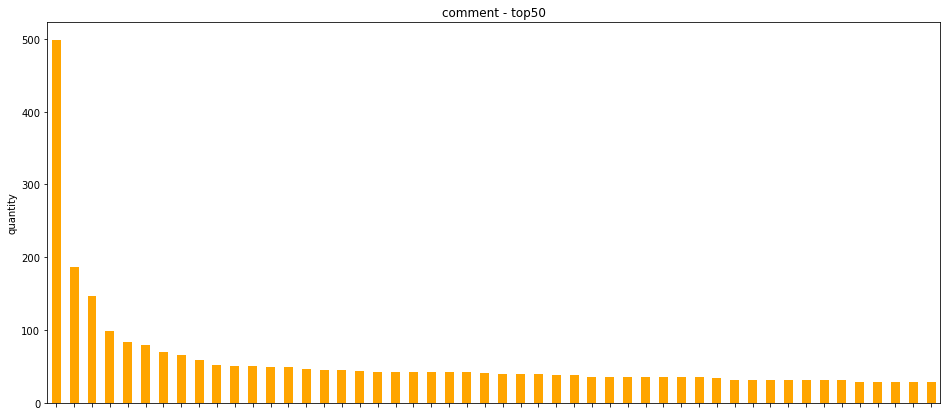

In [320]:
fig, ax = plt.subplots()
test = data['tie_zi'].sort_values(ascending=False)[:50]
test.plot.bar(figsize=(16, 7), color='orange')
plt.title('comment - top50')
ax.set_xticklabels([])
plt.ylabel('quantity')
plt.show()

In [255]:
data.sort_values(by='liu_lan', ascending=False).head(10)

,tie_zi,liu_lan,zan,url,title,clone_time,modified_time,published_time,share1,share2
1,498,145160,21,544,小伙伴们，你最希望Ricequant加入什么样的功能呢？,0,2017-08-24T02:21:47.706Z,2016-02-03T11:28:24.413Z,0,0
428,187,117987,73,394,【高收益低回撤】【止损】【夏普率4.0】改进版小盘股策略,4971,2017-06-29T07:14:22.203Z,2015-12-29T07:11:37.324Z,1,0
672,79,92946,29,51,配对交易(Paper Version),0,2017-05-16T13:39:25.081Z,2015-07-08T12:17:46.798Z,0,0
376,99,80413,38,285,Graham number 格雷厄姆数字价值投资法,2572,2017-07-07T10:08:27.439Z,2015-11-23T08:07:03.301Z,1,0
512,39,59046,60,558,【资源总结贴】Ricequant量化策略、技术姿势总结帖（持续更新中。。。）,1,2017-06-12T03:54:36.272Z,2016-02-07T08:26:15.347Z,0,1
356,147,58966,37,2147,【又更新了】有“脑子”会“看盘”的小盘股【年化68.444% | 夏普3.4771 | 回撤...,1435,2017-07-11T03:31:18.265Z,2016-12-05T13:13:32.853Z,1,0
1594,23,58425,31,1078,10分钟搞定pandas,755,2017-01-06T03:26:40.065Z,2016-05-15T03:37:06.790Z,1,1
304,83,54874,54,815,【神奇公式】如何在Ricequant上实现策略 - 1 从别人的经验和思路中实现策略,817,2017-07-17T16:16:43.449Z,2016-04-03T08:25:21.609Z,1,0
0,70,53813,32,765,新功能发布汇总贴 - 20170706更新,2,2017-04-11T07:53:36.964Z,2016-03-28T10:00:58.623Z,1,1
278,65,52756,44,761,Ricequant量化大课堂 - 你们想要的教学视频推出了！！！,0,2017-07-24T06:23:33.011Z,2016-03-28T04:29:54.432Z,0,0


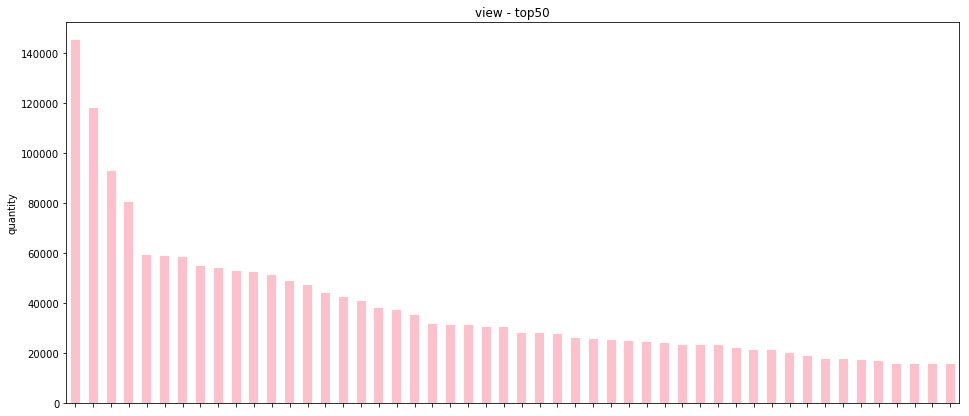

In [314]:
fig, ax = plt.subplots()
test = data['liu_lan'].sort_values(ascending=False)[:50]
test.plot.bar(figsize=(16, 7), color='pink')
plt.title('view - top50')
ax.set_xticklabels([])
plt.ylabel('quantity')
plt.show()

In [256]:
data.sort_values(by='zan', ascending=False).head(10)

,tie_zi,liu_lan,zan,url,title,clone_time,modified_time,published_time,share1,share2
428,187,117987,73,394,【高收益低回撤】【止损】【夏普率4.0】改进版小盘股策略,4971,2017-06-29T07:14:22.203Z,2015-12-29T07:11:37.324Z,1,0
414,38,37094,71,1150,【策略模板】一个新手适用的交易策略的模板（分钟回测，过滤涨跌停、停牌……）,1657,2017-07-02T15:45:02.190Z,2016-05-25T02:20:28.990Z,1,0
512,39,59046,60,558,【资源总结贴】Ricequant量化策略、技术姿势总结帖（持续更新中。。。）,1,2017-06-12T03:54:36.272Z,2016-02-07T08:26:15.347Z,0,1
248,42,24723,59,1422,【止损】 止损/止盈 方案目录 必读,461,2017-07-28T02:13:57.061Z,2016-07-14T03:49:14.333Z,1,0
304,83,54874,54,815,【神奇公式】如何在Ricequant上实现策略 - 1 从别人的经验和思路中实现策略,817,2017-07-17T16:16:43.449Z,2016-04-03T08:25:21.609Z,1,0
241,32,27759,51,788,HMM在股票上的简单应用,549,2017-07-30T05:33:31.662Z,2016-03-30T09:06:27.529Z,0,1
262,19,4290,49,3097,策略模版（私人订制绩效分析）,228,2017-07-26T10:30:47.113Z,2017-04-09T16:40:47.217Z,0,1
278,65,52756,44,761,Ricequant量化大课堂 - 你们想要的教学视频推出了！！！,0,2017-07-24T06:23:33.011Z,2016-03-28T04:29:54.432Z,0,0
376,99,80413,38,285,Graham number 格雷厄姆数字价值投资法,2572,2017-07-07T10:08:27.439Z,2015-11-23T08:07:03.301Z,1,0
928,42,44153,37,449,【学习资料】Python、R语言、计量经济学、投资书籍、研究报告等(Book+Video),0,2017-04-10T02:14:45.944Z,2016-01-13T09:51:34.101Z,0,0


In [257]:
data.sort_values(by='clone_time', ascending=False).head(10)

,tie_zi,liu_lan,zan,url,title,clone_time,modified_time,published_time,share1,share2
651,36,17676,9,2652,【期货】商品期货跨品种套利研究——稳住！,7627,2017-05-19T07:02:57.396Z,2017-02-28T06:48:54.818Z,1,1
428,187,117987,73,394,【高收益低回撤】【止损】【夏普率4.0】改进版小盘股策略,4971,2017-06-29T07:14:22.203Z,2015-12-29T07:11:37.324Z,1,0
376,99,80413,38,285,Graham number 格雷厄姆数字价值投资法,2572,2017-07-07T10:08:27.439Z,2015-11-23T08:07:03.301Z,1,0
414,38,37094,71,1150,【策略模板】一个新手适用的交易策略的模板（分钟回测，过滤涨跌停、停牌……）,1657,2017-07-02T15:45:02.190Z,2016-05-25T02:20:28.990Z,1,0
356,147,58966,37,2147,【又更新了】有“脑子”会“看盘”的小盘股【年化68.444% | 夏普3.4771 | 回撤...,1435,2017-07-11T03:31:18.265Z,2016-12-05T13:13:32.853Z,1,0
291,49,30295,30,1009,股息率策略【已更新】,1227,2017-07-20T07:09:17.542Z,2016-05-03T01:35:37.633Z,1,0
1277,35,25193,10,620,【开脑洞】【趋势的仆人，财富的主人】蛋卷斗牛二八轮动！,1065,2017-03-04T06:10:07.845Z,2016-02-29T00:11:16.950Z,1,0
545,42,18762,8,641,简单找板块“龙头股”策略,1000,2017-06-07T06:23:23.177Z,2016-03-06T08:30:20.692Z,1,0
1131,29,31128,8,392,【策略】Dual Thrust 交易策略,991,2017-03-17T09:28:28.510Z,2015-12-29T03:31:26.076Z,1,0
100,42,23219,15,297,基本面选股器: Piotroski F-Score ranking system,952,2017-08-14T16:02:26.063Z,2015-11-27T08:26:59.939Z,1,0


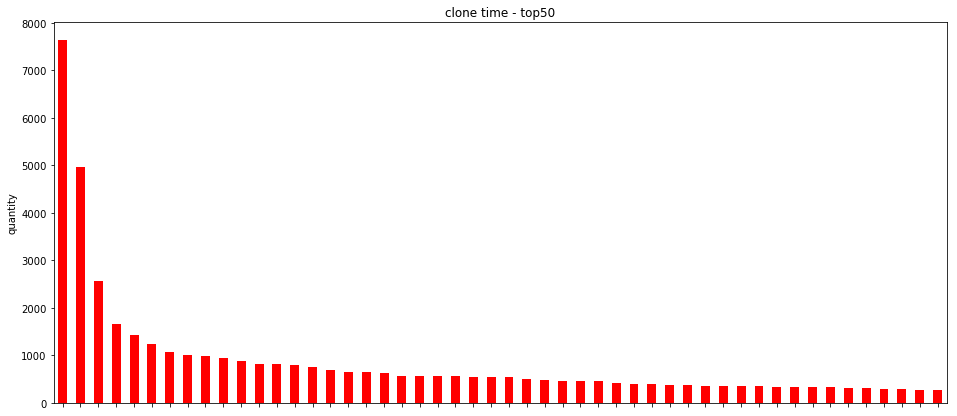

In [321]:
fig, ax = plt.subplots()
test = data['clone_time'].sort_values(ascending=False)[:50]
test.plot.bar(figsize=(16, 7), color='red')
plt.title('clone time - top50')
ax.set_xticklabels([])
plt.ylabel('quantity')
plt.show()

In [11]:
data.columns

Index(['tie_zi', 'liu_lan', 'zan', 'url', 'title', 'clone_time',
       'modified_time', 'published_time', 'share1', 'share2'],
      dtype='object')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/td/50l3s5314g1d5jqltmn1z1sr0000gn/T/jieba.cache
Loading model cost 1.076 seconds.
Prefix dict has been built succesfully.


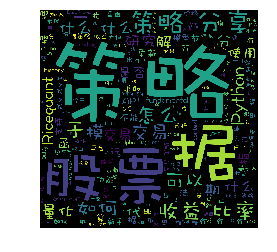

In [12]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the whole text.
text = ''
for item in data['title']:
    text = text + item
    
wordlist_after_jieba = jieba.cut(text, cut_all = True)    
wl_space_split = " ".join(wordlist_after_jieba)
wordcloud = WordCloud(font_path="WawaTC-Regular.otf",background_color="black",width=2000, height=2000, margin=2).generate(wl_space_split)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

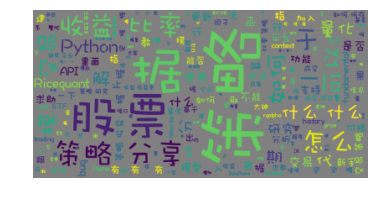

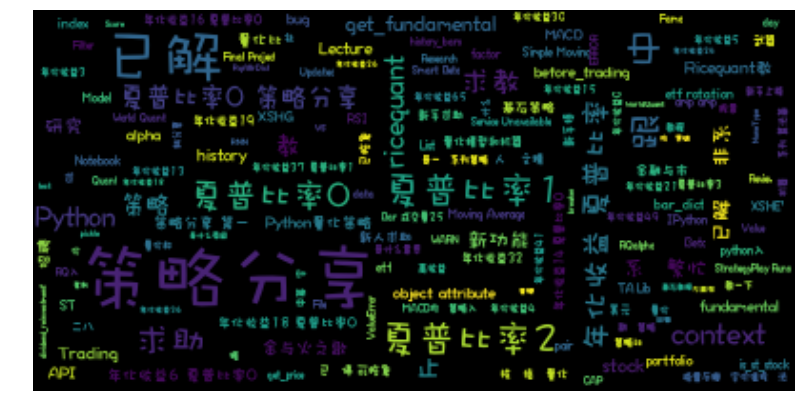

In [13]:
from os import path
from wordcloud import WordCloud


# Read the whole text.
text = ''
for item in data['title']:
    text = text + item

text = text.replace('的', '')
# Generate a word cloud image
wordlist_after_jieba = jieba.cut(text, cut_all = True)    
wl_space_split = " ".join(wordlist_after_jieba)
wordcloud = WordCloud(font_path="WawaTC-Regular.otf", background_color='grey').generate(wl_space_split)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(font_path="WawaTC-Regular.otf", background_color='black', max_font_size=40, max_words=2000).generate(text)
plt.figure(figsize=(16, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
with open('RQ.txt', 'w', encoding='utf-8') as f :
    f.write(wl_space_split)

In [15]:
import subprocess
subprocess.check_output(["wolframscript", "-code",'Take[WordCloud[Import["/Users/wonderful/Desktop/RQ.txt", "Plaintext"],],1]'])

b'\nSyntax::com: Warning: comma encountered with no adjacent expression. The\n     expression will be treated as Null. .\n\n\nWordCloud::invmsk: \n   Null is not a valid mask specification. Expecting an Image, a Graphics, a\n     Region, Automatic, or None.\n\nFrontEndObject::notavail: \n   A front end is not available; certain operations require a front end.\n\nFrontEndObject::notavail: \n   A front end is not available; certain operations require a front end.\nGraphics[{Style[{Inset[Style[\xe7\xad\x96\xe7\x95\xa5, FontSize -> Scaled[0.24137931034482757], FontColor -> RGBColor[0.368417, 0.506779, 0.709798]], {0, 0}, Center, Automatic], Inset[Style[\xe6\x95\xb0\xe6\x8d\xae, FontSize -> Scaled[0.15685077815074763], FontColor -> RGBColor[0.880722, 0.611041, 0.142051]], {5., -55.}, Center, Automatic], Inset[Style[\xe9\x97\xae\xe9\xa2\x98, FontSize -> Scaled[0.12664021971315229], FontColor -> RGBColor[0.922526, 0.385626, 0.209179]], {-5., 50.}, Center, Automatic], Inset[Style[\xe5\xa6\x82\

#Mathematica 代码   

    Take[
     WordCloud[
      Import[
       "/Users/wonderful/Desktop/RQ.txt", "Plaintext"],
      ],
     1]

In [169]:
data_time = data[['tie_zi', 'share1', 'share2']]

In [170]:
data_time.index = data['published_time']

In [171]:
sign = pd.DataFrame(np.ones(len(data_time.index)), index=data_time.index)

In [172]:
data_time = pd.merge(data_time, sign, how='left', left_index=True, right_index=True)
data_time.columns = ['tie_zi', 'share1', 'share2', 'sign']

In [173]:
data_time.index = pd.to_datetime(data_time.index)
from pandas.tseries.offsets import Hour
data_time.index = data_time.index + Hour(8)

In [174]:
data_time.head()

,tie_zi,share1,share2,sign
published_time,,,,
2015-05-21 12:24:59.334,8,0,0,1.0
2015-05-21 13:47:43.284,22,0,0,1.0
2015-05-21 16:42:08.808,5,0,0,1.0
2015-05-22 15:18:26.629,15,0,0,1.0
2015-05-22 21:33:14.374,1,0,0,1.0


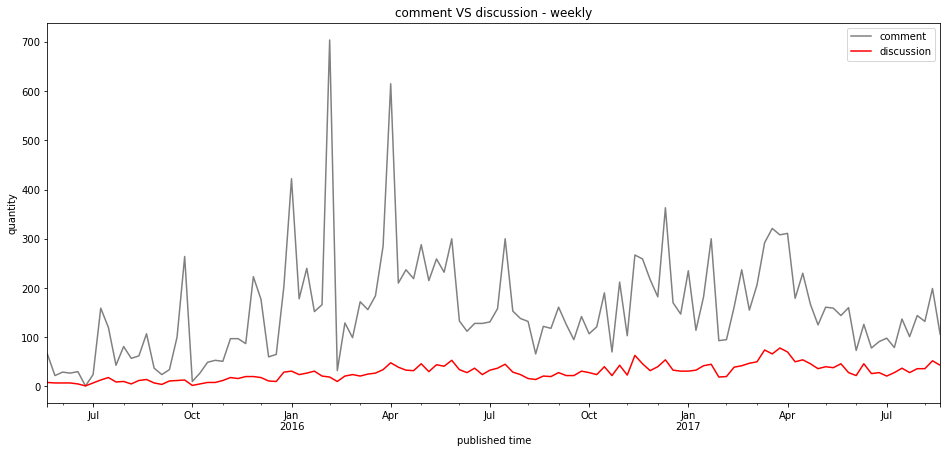

In [274]:
%matplotlib inline
r1 = data_time.resample('W', kind='period').sum().fillna(0)
r1 = r1.iloc[:-1, :]
r1['tie_zi'].plot(figsize=(16, 7), label='comment', color='grey')
r1['sign'].plot(figsize=(16, 7), label='discussion', color='red')
plt.title('comment VS discussion - weekly')
plt.xlabel('published time')
plt.ylabel('quantity')
plt.legend(loc='best')
plt.show()

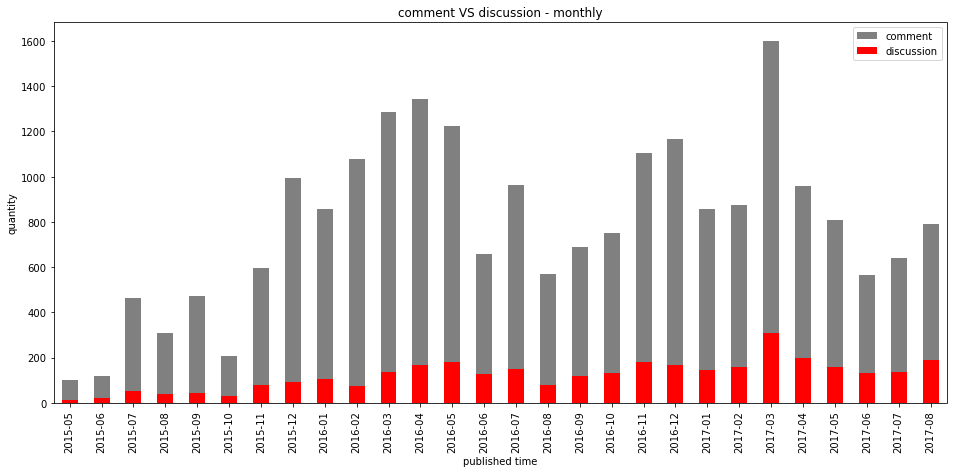

In [237]:
r2 = data_time.resample('M', kind='period').sum().fillna(0)
r2.iloc[-1, :] = r2.iloc[-1, :] * 31 / 24
r2['sum'] = r2['tie_zi'] + r2['sign']
r2['sum'].plot.bar(figsize=(16, 7), label='comment', color='grey')
r2['sign'].plot.bar(figsize=(16, 7), label='discussion', color='red')
plt.title('comment VS discussion - monthly')
plt.xlabel('published time')
plt.ylabel('quantity')
plt.legend(loc='best')
plt.show()

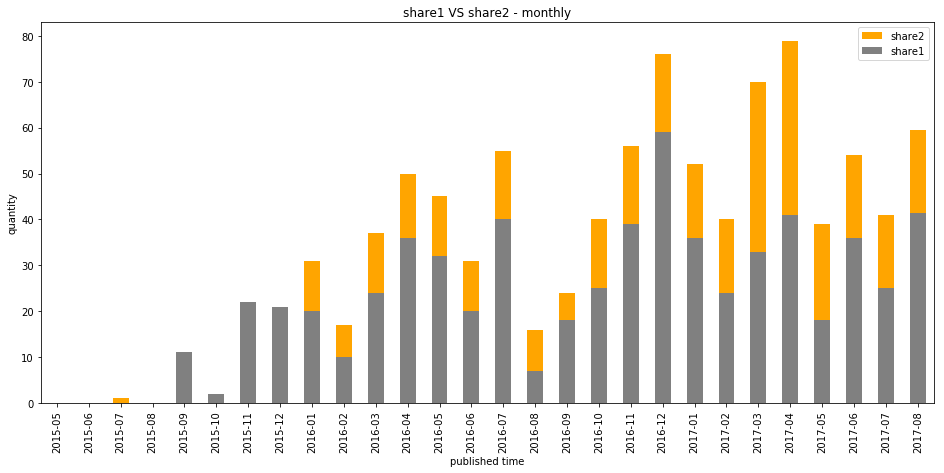

In [239]:
r3 = data_time.resample('M', kind='period').sum().fillna(0)
r3.iloc[-1, :] = r3.iloc[-1, :] * 31 / 24
r3['share'] = r3['share1'] + r3['share2']
r3['share'].plot.bar(figsize=(16, 7), label='share2', color='orange')
r3['share1'].plot.bar(figsize=(16, 7), label='share1', color='grey')
plt.title('share1 VS share2 - monthly')
plt.xlabel('published time')
plt.ylabel('quantity')
plt.legend(loc='best')
plt.show()

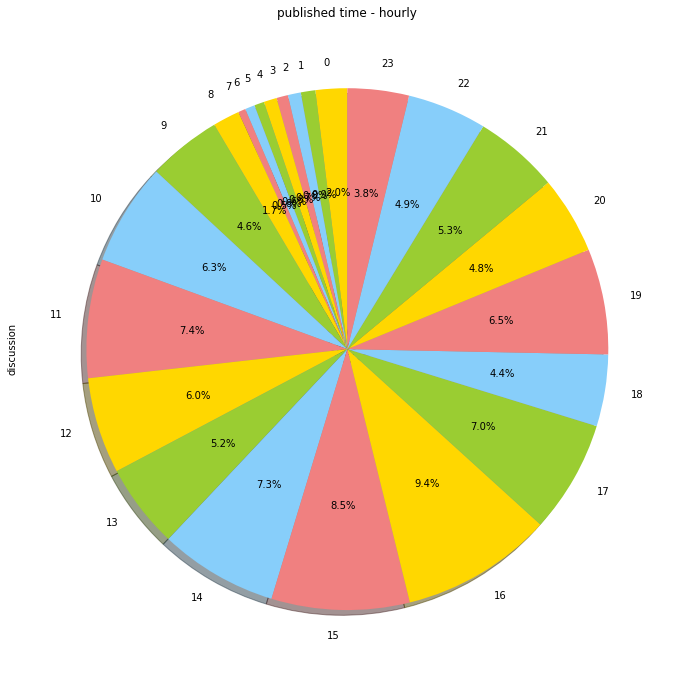

In [268]:
fig, ax = plt.subplots()
r4 = data_time.resample('1H', kind='period').sum().fillna(0)
r4['flag'] = r4.index.hour
r4 = r4.groupby(r4['flag']).sum()
r4.columns = ['discussion', 'share1', 'share2', 'sign']
r4['discussion'].plot.pie(figsize=(12, 12), colors=['gold', 'yellowgreen', 'lightskyblue', 'lightcoral'], 
                     autopct='%1.1f%%', shadow=True, startangle=90,radius=1)
ax.set(aspect='equal')
plt.title('published time - hourly')
plt.show()

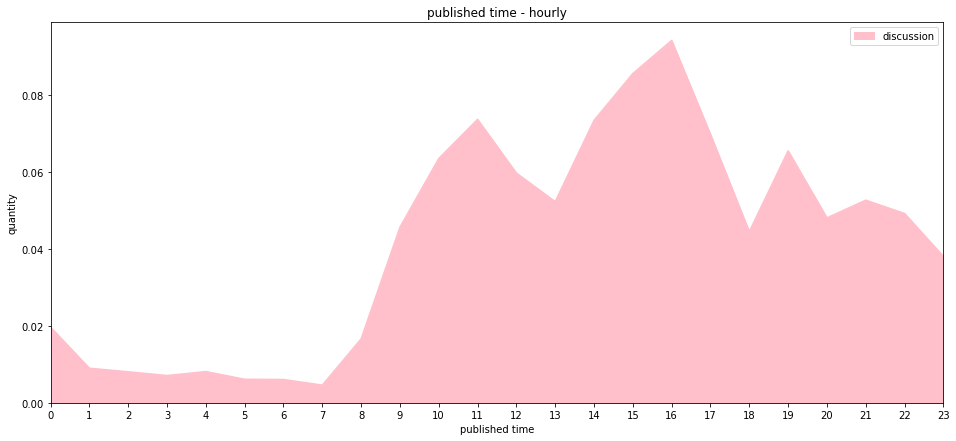

In [272]:
fig, ax = plt.subplots()
pct = r4['discussion'] / r4['discussion'].sum()
pct.plot.area(figsize=(16, 7), label='discussion', color='pink')
plt.title('published time - hourly')
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
plt.xlabel('published time')
plt.ylabel('quantity')
plt.legend(loc='best')
plt.show()

In [280]:
import pyecharts
import talib
import numpy as np
import tushare as ts
from pyecharts import Grid, Line, Kline, Overlap

data = ts.get_k_data('399300', index=True, start='2017-01-01', end='2017-06-31')
ochl = data[['open', 'close', 'high', 'low']]
ochl_tolist = [ochl.loc[i].tolist() for i in range(len(ochl))]

sma_10 = talib.SMA(np.array(data['close']), 10)
sma_30 = talib.SMA(np.array(data['close']), 30)

kline = Kline()
kline.add("日K", data['date'], ochl_tolist, is_datazoom_show=True)

line = Line()
line.add('10 日均线', data['date'], sma_10, is_fill=False, line_opacity=0.8, is_smooth=True)
line.add('30 日均线', data['date'], sma_30, is_fill=False, line_opacity=0.8, is_smooth=True)

overlap = Overlap()
overlap.add(kline)
overlap.add(line)
overlap.render()
overlap